In [17]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import re
import os
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [18]:
path = "./spongebob_data" # make sure this pathname matches or this wont work
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
print(dir_list)

Files and directories in ' ./spongebob_data ' :
['LighthouseLouie.txt', 'PennyFoolish.txt', 'BarnacleFace.txt', 'OralReport.txt', 'TheKrustySlammer.txt', 'SentimentalSponge.txt', 'FunSizedFriends.txt', 'ManRayReturns.txt', 'MyLeg.txt', 'BummerVacation.txt', 'PatricksCoupon.txt', 'GulliblePants.txt', 'TheGreatPattyCaper.txt', 'StuckontheRoof.txt', 'Karen.txt', 'BigSisterSam.txt', 'MermaidManandBarnacleBoy.txt', 'ACabinintheKelp.txt', 'MermaidManandBarnacleBoyV.txt', 'TheGetaway.txt', 'SpongeBobMeetstheStrangler.txt', 'BumpertoBumper.txt', 'GooGooGas.txt', 'BigPinkLoser.txt', 'GrandmumstheWord.txt', 'ToyStoreofDoom.txt', 'NewLeaf.txt', 'SandCastlesintheSand.txt', 'BornAgainKrabs.txt', 'BuriedinTime.txt', 'AreYouHappyNow.txt', 'SingaSongofPatrick.txt', 'ShellbackShenanigans.txt', 'OldManPatrick.txt', 'PatricksStaycation.txt', 'SB.txt', 'ChimpsAhoy.txt', 'NaturePants.txt', 'SpongeBobvsthePattyGadget.txt', 'LarrytheFloorManager.txt', 'NightLight.txt', 'SalsaImbecilicus.txt', 'ChefBob.txt', 

In [19]:
transcripts = {}


for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file = os.path.join(dirname,filename)
        f = open(file)
        transcripts[os.path.basename(file[:-4])] = f.read()
print(len(transcripts))

393


In [20]:
lines = {episode: transcripts[episode].splitlines() for episode in transcripts.keys()}
print(lines['KrabBorg']) # check that it works

['', "TV narrator: [SpongeBob is watching the movie while eating popcorn] We now return to tonight's Creepy Time Theater presentation of Night of the Robot.", 'Man being chased: [screaming while being chased by a giant robot]', "SpongeBob: Hurry, Gary, the scary robot movie's on. ", 'Gary: Meow. ', "SpongeBob: What do you mean I shouldn't watch this? Scary movies don't always freak me out! [scene cuts to SpongeBob lying in his bed, whimpering and shivering] What if Mom is a robot? What if Uncle Sherm is a robot? What if Gary is a robot? Gary? [Gary is sleeping] Psst, Gary? Gare-Bear? [pokes Gary's eye, causing him to wake up] ", 'Gary: Meow! ', "SpongeBob: Gary, if you were a robot, you'd tell me, right? ", 'Gary: Meow. ', "SpongeBob: Oh, I've got nothing to worry about. And now to get a good night's sleep. [goes to sleep. Dreams about running from the giant robot from the movie earlier. Scene cuts to the next day at the Krusty Krab, with SpongeBob in the kitchen, panting] Robot! OH MY

In [21]:
spongebob_lines = {}
for episode in lines:
    episode_lines = lines[episode]
    spongebob_episode_lines = []
    for line in episode_lines:
        if('SpongeBob:' in line and line.find('SpongeBob:') == 0):
            spongebob_episode_lines.append(line)
    spongebob_lines[episode] = spongebob_episode_lines
print(spongebob_lines['KrabBorg'])

["SpongeBob: Hurry, Gary, the scary robot movie's on. ", "SpongeBob: What do you mean I shouldn't watch this? Scary movies don't always freak me out! [scene cuts to SpongeBob lying in his bed, whimpering and shivering] What if Mom is a robot? What if Uncle Sherm is a robot? What if Gary is a robot? Gary? [Gary is sleeping] Psst, Gary? Gare-Bear? [pokes Gary's eye, causing him to wake up] ", "SpongeBob: Gary, if you were a robot, you'd tell me, right? ", "SpongeBob: Oh, I've got nothing to worry about. And now to get a good night's sleep. [goes to sleep. Dreams about running from the giant robot from the movie earlier. Scene cuts to the next day at the Krusty Krab, with SpongeBob in the kitchen, panting] Robot! OH MY GOSH! [robot turns out to be a sack of potatoes, a dust pan and broom, and a bucket] Huh? [chuckles nervously. Scene cuts to Mr. Krabs holding down his money on his office desk] ", 'SpongeBob: I SURRENDER!!! Oh... ', 'SpongeBob: Squidward, why are you wearing my hat on your

Text(0.5, 1.0, 'Number of spongebob lines per episode')

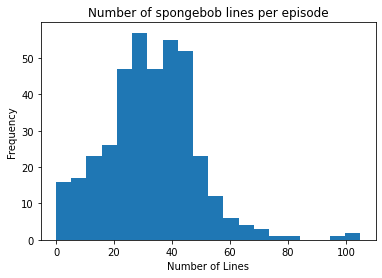

In [22]:
spongebob_num_lines = {episode: len(spongebob_lines[episode]) for episode in spongebob_lines.keys()}
plt.xlabel('Number of Lines')
plt.ylabel('Frequency')
plt.hist(spongebob_num_lines.values(), bins=20)
plt.title('Number of spongebob lines per episode')

In [23]:
def hasNestedBrackets(line):
    left_bracket_indices =  [i for i, char in enumerate(line) if char == '[']
    right_bracket_indices = [i for i, char in enumerate(line) if char == ']']
    if len(left_bracket_indices) == 0:
        return False
    for i in range(len(left_bracket_indices)):
        if(i == len(left_bracket_indices)-1):
            return False
        if left_bracket_indices[i+1] < right_bracket_indices[i]:
            return True
    return True
       
         
def getRidOfStuffInBrackets(line):
    if(line is None or line == ''): 
        print('line dne', line)
        return ''
    if line.count('[') != line.count(']'):
        print('incorrect brackets')
        return ''
    if hasNestedBrackets(line):
        print('nested brackets')
        return ''
    num_iter = 0
    new_line = line
    while ('[' in new_line and ']' in new_line):
            start_idx, end_idx = new_line.find('['), new_line.find(']')
            new_line = new_line[0 : start_idx] + new_line[end_idx+1:]  
            num_iter += 1
            if(num_iter == 100): 
                print("original:\n", line, "\nNew:\n", new_line, "\n---------------")
                return ''
    return new_line

In [24]:
for n, episode in enumerate(spongebob_lines):
    episode_lines = []
    for i, line in enumerate(spongebob_lines[episode]):
        no_bracket_line = getRidOfStuffInBrackets(line)
        episode_lines.append(no_bracket_line)
    spongebob_lines[episode] = episode_lines
        
print(spongebob_lines['KrabBorg'])

incorrect brackets
incorrect brackets
incorrect brackets
incorrect brackets
nested brackets
incorrect brackets
["SpongeBob: Hurry, Gary, the scary robot movie's on. ", "SpongeBob: What do you mean I shouldn't watch this? Scary movies don't always freak me out!  What if Mom is a robot? What if Uncle Sherm is a robot? What if Gary is a robot? Gary?  Psst, Gary? Gare-Bear?  ", "SpongeBob: Gary, if you were a robot, you'd tell me, right? ", "SpongeBob: Oh, I've got nothing to worry about. And now to get a good night's sleep.  Robot! OH MY GOSH!  Huh?  ", 'SpongeBob: I SURRENDER!!! Oh... ', 'SpongeBob: Squidward, why are you wearing my hat on your nose? ', "SpongeBob: #17 --  Krabby Patty and a medium beverage. Course. Sorry Squidward, I'm not really feeling myself today. I guess I'm a little bit jumpy. I keep thinking robots are taking over the world, probably on account of this movie I watched last night where robots take over the world. I even asked Gary if he was a robot! Pretty funny, 

In [25]:
total_lines = 0
for episode in spongebob_lines:
    total_lines += len(spongebob_lines[episode])
print(total_lines)

12848


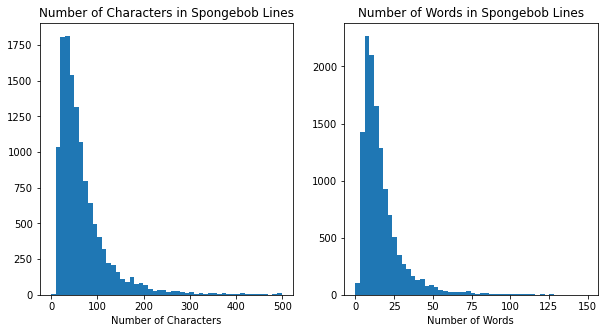

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))


line_length = [] 
line_num_words = []
for episode in spongebob_lines:
    for line in spongebob_lines[episode]:
        l = len(line)
        if l < 500:
            line_length.append(l)
            line_num_words.append(len(word_tokenize(line)))
ax1.hist(line_length, bins=50)
ax1.set_title("Number of Characters in Spongebob Lines")
ax1.set_xlabel("Number of Characters")

ax2.hist(line_num_words, bins=50)
ax2.set_title("Number of Words in Spongebob Lines")
ax2.set_xlabel("Number of Words")
plt.show()

total character mentions:  4442


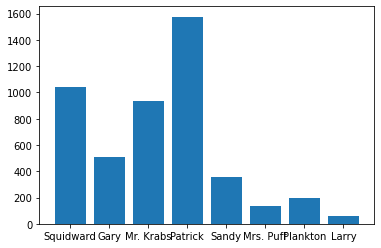

In [27]:
spongebob_characters = ['Squidward', 'Gary', 'Mr. Krabs', 'Patrick', 'Sandy', 'Mrs. Puff', 'Plankton', 'Larry']
character_mention_counts = {'Squidward':0, 'Gary':0, 'Mr. Krabs':0, 'Patrick':0, 'Sandy':0, 'Mrs. Puff':0, 'Plankton':0, 'Larry':0}
def hasCharacterMention(line):
    hasCharacter = False
    for character in spongebob_characters:
        if character in line:
            character_mention_counts[character] += 1
            hasCharacter = True
    return hasCharacter


num_character_mentions = 0
for episode in spongebob_lines:
    for line in spongebob_lines[episode]:
        if(hasCharacterMention(line)):
            num_character_mentions += 1
print("total character mentions: ", num_character_mentions)
plt.bar(character_mention_counts.keys(), character_mention_counts.values())
plt.show()

    

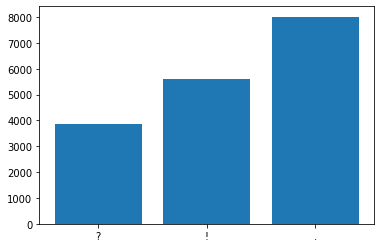

In [28]:
punctuation_counts = {'?':0, '!':0, '.':0}
p = punctuation_counts.keys()
def update_punctuation_counts(line):
    for punctuation in p:
        if punctuation in line:
            punctuation_counts[punctuation] += 1
    return 

for episode in spongebob_lines:
    for line in spongebob_lines[episode]:
        update_punctuation_counts(line)
plt.bar(punctuation_counts.keys(), punctuation_counts.values())
plt.show()

In [29]:
chatbotdata = pd.read_csv('dialogs.txt', sep='\t', header=None)
chatbotdata.head(5)

,0,1
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [30]:
print(chatbotdata.shape)

(3725, 2)


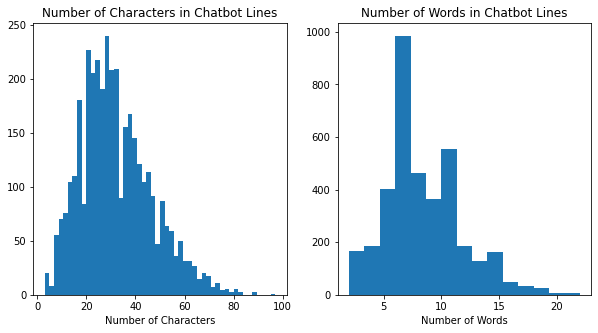

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

line_length_cb = []
word_count_cb = []

for response in chatbotdata[1]:
    line_length_cb.append(len(response))
    word_count_cb.append(len(word_tokenize(response)))

    
ax1.hist(line_length_cb, bins=50)
ax1.set_title("Number of Characters in Chatbot Lines")
ax1.set_xlabel("Number of Characters")

ax2.hist(word_count_cb, bins=15)
ax2.set_title("Number of Words in Chatbot Lines")
ax2.set_xlabel("Number of Words")
plt.show()


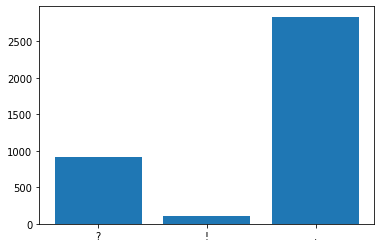

In [33]:
punctuation_counts = {'?':0, '!':0, '.':0}
p = punctuation_counts.keys()
def update_punctuation_counts(line):
    for punctuation in p:
        if punctuation in line:
            punctuation_counts[punctuation] += 1
    return 


for line in chatbotdata[1]:
    update_punctuation_counts(line)
plt.bar(punctuation_counts.keys(), punctuation_counts.values())
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (3725,).

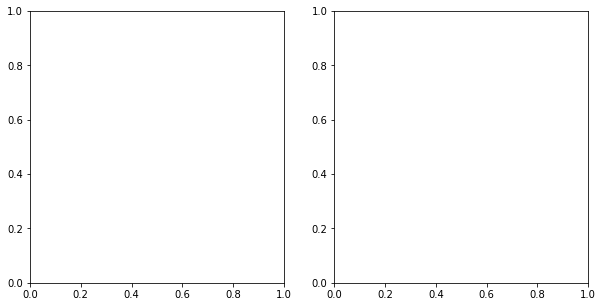

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

sponge_sent = []
chatbot_sent = []

for episode in spongebob_lines:
    for line in spongebob_lines[episode]:
        s = sent_tokenize(line)
        sponge_sent.append(len(s))
for line in chatbotdata[1]:
    chatbot_sent.append(len(sent_tokenize(line)))
    
chatbot_sent = np.array(chatbot_sent)
sponge_sent = np.array(sponge_sent)


